# Foraging models

In [1]:
from groo.groo import get_root
root_dir = get_root(".hidden_root_foraging")

import sys, os
sys.path.append(os.path.join(root_dir, "scripts", "lib"))
from models import forage_env_hayden

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hayden 2011
- initial check

In [2]:
R,T,Tmat,Mmat,Regmat=forage_env_hayden(1,0.975,[0.1, 0.5], nepi=10)

In [12]:
# sam's code
Regmat=np.array(Regmat)
y=[Regmat[i][0] for i in range(0,len(Regmat))]
x_Rp=[Regmat[i][1] for i in range(0,len(Regmat))]
x_R=[Regmat[i][2] for i in range(0,len(Regmat))]
x=pd.DataFrame([x_Rp,x_R])
x=x.T

logit_model=sm.Logit(y,x)
result=logit_model.fit()
#print(result.summary2())
coef_Rp=result.params[0]
coef_R=result.params[1]
ratio=np.abs(coef_Rp)/np.abs(coef_R)
#print(ratio)

Optimization terminated successfully.
         Current function value: 0.059903
         Iterations 14
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.608    
Dependent Variable: y                AIC:              3400.2409
Date:               2022-06-30 20:01 BIC:              3416.7455
No. Observations:   28348            Log-Likelihood:   -1698.1  
Df Model:           1                LL-Null:          -4326.7  
Df Residuals:       28346            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     14.0000                                     
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
0       -1.6075     0.0633   -25.3949   0.0000   -1.7315   -1.4834
1        1.5325     0.0611    25.1007   0.0000    1.4128    1.6522

1

In [4]:
df = pd.DataFrame(Regmat, columns=["choice", "rew_patch", "rew_env", "travel_time", "patchID"])
df.head(25)

choice  rew_patch     rew_env  travel_time  patchID
0        0  86.197183  120.000000          0.5        0
1        1  75.555556   55.135135          0.5        0
2        0  68.000000   71.578947          0.5        1
3        1  68.000000   52.085106          0.5        1
4        0  72.857143   63.529412          0.5        2
5        0  83.521127   69.452450          0.5        2
6        0  88.307692   73.650000          0.5        2
7        0  90.612245   76.533333          0.5        2
8        0  88.157895   76.699411          0.5        2
9        0  87.875354   77.526882          0.5        2
10       0  85.862069   77.086743          0.5        2
11       0  83.851204   76.374622          0.5        2
12       0  80.701754   74.707521          0.5        2
13       0  78.750000   73.647059          0.5        2
14       0  74.272000   70.674699          0.5        2
15       0  71.327434   68.629672          0.5        2
16       0  67.642276   65.917285          0.5        2
17       0  63.875000   63.024876          0.5        2
18       0  60.560093   60.395480          0.5        2
19       0  57.557756   57.953321          0.5        2
20       0  54.146846   55.119454          0.5        2
21       0  51.637081   52.994258          0.5        2
22       1  51.637081   50.706436          0.5        2
23       0  68.764045   53.053263          0.5        3
24       0  82.937063   55.126172          0.5        3

#### Patch and global reward/t over 10 patches

Text(0.5, 1.0, 'patch reward')

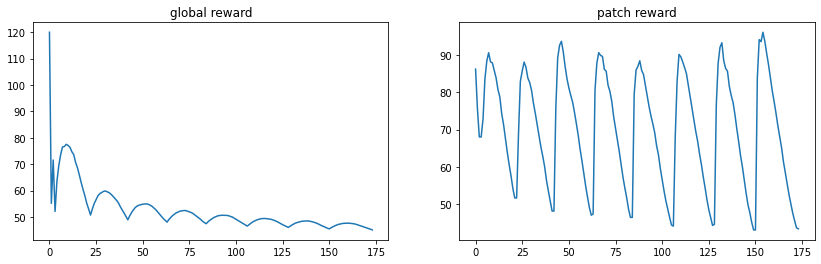

In [5]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
ax[0].plot(df["rew_env"])
ax[0].set_title("global reward")
ax[1].plot(df["rew_patch"])
ax[1].set_title("patch reward")



#### leaving times as a function of patch reward and global reward biases

Optimization terminated successfully.
         Current function value: 0.054866
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.050863
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.047821
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.045573
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.040795
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.036966
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.052264
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.049205
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.045719
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.

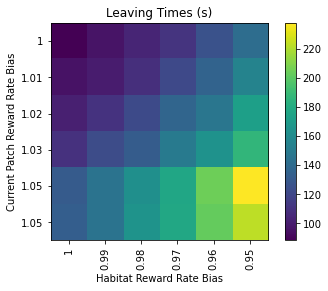

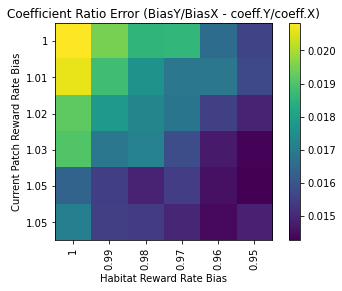

In [6]:


# now run the simulation over several different bias inputs
biasA_vec=[1,1.01,1.02,1.03,1.05,1.05] #,1.06,1.07,1.08,1.09,1.1]
biasB_vec=[1,0.99,0.98,0.97,0.96,0.95] #,0.94,0.93,0.92,0.91,0.9]

heatmap_ratio_error = np.full([len(biasA_vec), len(biasB_vec)], np.nan)
heatmap_leaving_times = np.full([len(biasA_vec), len(biasB_vec)], np.nan)

for ibiasA in range(0,len(biasA_vec)):
    for ibiasB in range(0,len(biasB_vec)):
        biasA=biasA_vec[ibiasA]
        biasB=biasB_vec[ibiasB]
        
        R,T,Tmat,Mmat,Regmat=forage_env_hayden(biasA,biasB,[5])
        
        # what do coefficients look like?
        Regmat=np.array(Regmat)
        y=[Regmat[i][0] for i in range(0,len(Regmat))]
        x_Rp=[Regmat[i][1] for i in range(0,len(Regmat))]
        x_R=[Regmat[i][2] for i in range(0,len(Regmat))]
        x=pd.DataFrame([x_Rp,x_R])
        x=x.T
        #x=sm.tools.tools.add_constant(x) # here the constant should capture the influence of travel time
        logit_model=sm.Logit(y,x)
        result=logit_model.fit()
        #print(result.summary2())
        coef_Rp=result.params[0]
        coef_R=result.params[1]
        ratio=np.abs(coef_Rp)/np.abs(coef_R)
        error=np.abs((biasA/biasB)-np.abs(ratio))
        
        heatmap_ratio_error[ibiasA][ibiasB]=error
        heatmap_leaving_times[ibiasA][ibiasB]=np.mean(Tmat[:,1])
        

# 1. what are the leaving times for each of the biases?
# 2D array should be rows x columns (i.e. rows plotted along y, columns along x)
plt.imshow(heatmap_leaving_times, cmap='viridis')
plt.ylabel('Current Patch Reward Rate Bias')
plt.xlabel('Habitat Reward Rate Bias')
labelsY=[str(val) for val in biasA_vec]
labelsX=[str(val) for val in biasB_vec]
plt.yticks(range(0,len(biasA_vec)), labelsY, rotation='horizontal')
plt.xticks(range(0,len(biasB_vec)), labelsX, rotation='vertical')
plt.colorbar()
plt.title('Leaving Times (s)')
plt.show()



#### Recovery error using logit

In [ ]:
# 2. What is error of the coefficient ratio (compared with the actual input)?
plt.imshow(heatmap_ratio_error, cmap='viridis')
plt.ylabel('Current Patch Reward Rate Bias')
plt.xlabel('Habitat Reward Rate Bias')
labelsY=[str(val) for val in biasA_vec]
labelsX=[str(val) for val in biasB_vec]
plt.yticks(range(0,len(biasA_vec)), labelsY, rotation='horizontal')
plt.xticks(range(0,len(biasB_vec)), labelsX, rotation='vertical')
plt.colorbar()
plt.title('Coefficient Ratio Error (BiasY/BiasX - coeff.Y/coeff.X)')
plt.show()

#### Param recvery using optim

In [ ]:
# Generate N data sets 